<a href="https://colab.research.google.com/github/MathewsJosh/Resmat/blob/main/%5BMAC015%5D_Trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instruções e integrantes da equipe:

Todos do grupo devem preencher o [formulário](https://classroom.google.com/c/MzM3ODIzOTU2OTk2/a/Mzc1MDEwMDIzMDU1/details) abaixo, onde serão solicitados os nomes dos integrantes e o link do trabalho (utilize o Colab). Utilize o email institucional @estudante.ufjf.br


Integrantes da Equipe:

Gustavo Morais<br>
Matheus Casarim<br>
Mathews Edwirds<br>
Nykolas Catalão

#Exercicio 1

Resolva e apresente um relatório sobre o seguinte problema:






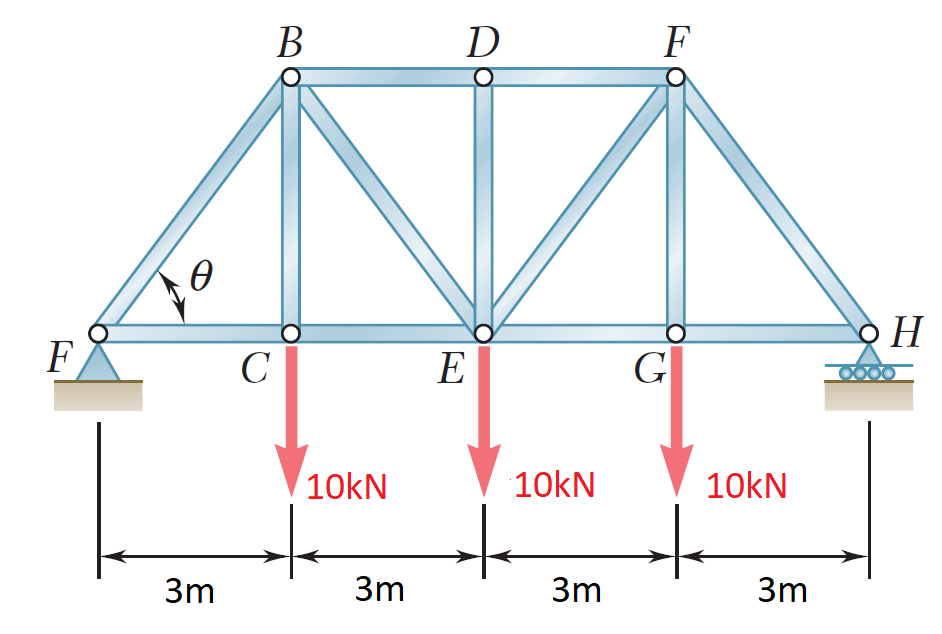






A treliça de aço Pratt (a imagem está no formulário em anexo) deve ser projetada para suportar três
cargas de 10 kN como mostrado na figura. O comprimento da treliça deve ser de
12m e a altura da treliça variável, conforme o ângulo theta.




Especificamente, a área da seção transversal de cada barra
será escolhida de forma que a tensão normal (força dividida por área) seja
igual à tensão admissível de 140MPa. Sabendo que o peso específico do aço utilizado
é 7850 Kg/m³, escreva um código que calcule o peso da treliça para valores de
theta de 20º a 80º, usando incrementos de 5º. Ignore o peso de qualquer
elemento de força nula. Responda, com justificativas, se é possível encontrar uma solução ótima para
esse projeto.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dados informados
tensaoADM = 140 * (10**3)                     #De MPa para kPa
densidadeAco = 7850                           #kg/m³
theta = np.arange(20, 85, 5)                  #°
cargaTotal = 30                               #KN
comprimento = 12                              #m

#Calculo dos esforços nas barras
TFC = 15 / np.tan(np.deg2rad(theta))
TFB = -15 / np.sin(np.deg2rad(theta))
TCB = (np.arange(13))
TCB.fill(10.0)
TBE = 5 / np.sin(np.deg2rad(theta))
TBD = -20 / np.tan(np.deg2rad(theta))
TCE = 15 / np.tan(np.deg2rad(theta))
TDE = 0.0
TDF = -20 / np.tan(np.deg2rad(theta))
TFE = 5 / np.sin(np.deg2rad(theta))
TFG = (np.arange(13))
TFG.fill(10.0)
TEG = 15 / np.tan(np.deg2rad(theta))
TFH = -15 / np.sin(np.deg2rad(theta))
TGH = 15 / np.tan(np.deg2rad(theta))

#Areas das barras
AREA_TFC = TFC/tensaoADM
AREA_TFB = TFB/tensaoADM
AREA_TCB = TCB/tensaoADM
AREA_TBE = TBE/tensaoADM
AREA_TBD = TBD/tensaoADM
AREA_TCE = TCE/tensaoADM
AREA_TDE = TDE/tensaoADM
AREA_TDF = TDF/tensaoADM
AREA_TFE = TFE/tensaoADM
AREA_TFG = TFG/tensaoADM
AREA_TEG = TEG/tensaoADM
AREA_TFH = TFH/tensaoADM
AREA_TGH = TGH/tensaoADM

#Comprimentos das barras
COMP_TFC = 3
COMP_TCE = 3
COMP_TEG = 3
COMP_TGH = 3
COMP_TBD = 3
COMP_TDF = 3
COMP_TFB = 3 / np.cos(np.deg2rad(theta))
COMP_TBE = COMP_TFB
COMP_TFE = COMP_TFB
COMP_TFH = COMP_TFB
COMP_TCB = 3 * np.tan(np.deg2rad(theta))
COMP_TDE = COMP_TCB
COMP_TFG = COMP_TCB

print("\nTabela com cada um dos valores dos esforços para cada valor de theta:")
DF_esforcos = pd.DataFrame([TFB,TFC,TCE,TCB,TBE,TBD,TDF,TFE,TEG,TGH,TFG,TFH],index=['TFB','TFC', 'TCE', 'TCB', 'TBE', 'TBD', 'TDF', 'TFE', 'TEG','TGH','TFG','TFH'], columns = theta)
display(DF_esforcos)


Tabela com cada um dos valores dos esforços para cada valor de theta:


,20,25,30,35,40,45,50,55,60,65,70,75,80
TFB,-43.857066,-35.493024,-30.000000,-26.151702,-23.335857,-21.213203,-19.581109,-18.311619,-17.320508,-16.550669,-15.962667,-15.529143,-15.231399
TFC,41.212161,32.167604,25.980762,21.422220,17.876304,15.000000,12.586494,10.503113,8.660254,6.994615,5.459554,4.019238,2.644905
TCE,41.212161,32.167604,25.980762,21.422220,17.876304,15.000000,12.586494,10.503113,8.660254,6.994615,5.459554,4.019238,2.644905
TCB,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
TBE,14.619022,11.831008,10.000000,8.717234,7.778619,7.071068,6.527036,6.103873,5.773503,5.516890,5.320889,5.176381,5.077133
TBD,-54.949548,-42.890138,-34.641016,-28.562960,-23.835072,-20.000000,-16.781993,-14.004151,-11.547005,-9.326153,-7.279405,-5.358984,-3.526540
TDF,-54.949548,-42.890138,-34.641016,-28.562960,-23.835072,-20.000000,-16.781993,-14.004151,-11.547005,-9.326153,-7.279405,-5.358984,-3.526540
TFE,14.619022,11.831008,10.000000,8.717234,7.778619,7.071068,6.527036,6.103873,5.773503,5.516890,5.320889,5.176381,5.077133
TEG,41.212161,32.167604,25.980762,21.422220,17.876304,15.000000,12.586494,10.503113,8.660254,6.994615,5.459554,4.019238,2.644905
TGH,41.212161,32.167604,25.980762,21.422220,17.876304,15.000000,12.586494,10.503113,8.660254,6.994615,5.459554,4.019238,2.644905


#Encontrando o peso total:

In [ ]:
PESO_TOTAL = []
print("Para calcular o peso total usaremos: areaDaBarra * comprimento da barra * densidadeAco\n")

# Peso calculado para cada uma das barras
PFC = np.absolute((TFC / tensaoADM) * COMP_TFC * densidadeAco)
PCE = np.absolute((TCE / tensaoADM) * COMP_TCE * densidadeAco)
PEG = np.absolute((TEG / tensaoADM) * COMP_TEG * densidadeAco)
PGH = np.absolute((TGH / tensaoADM) * COMP_TGH * densidadeAco)
PBD = np.absolute((TBD / tensaoADM) * COMP_TBD * densidadeAco)
PDF = np.absolute((TDF / tensaoADM) * COMP_TDF * densidadeAco)
PFB = np.absolute((TFB / tensaoADM) * COMP_TFB * densidadeAco)
PBE = np.absolute((TBE / tensaoADM) * COMP_TBE * densidadeAco)
PCB = np.absolute((TCB / tensaoADM) * COMP_TCB * densidadeAco)
PFE = np.absolute((TFE / tensaoADM) * COMP_TFE * densidadeAco)
PFH = np.absolute((TFH / tensaoADM) * COMP_TFH * densidadeAco)
PFG = np.absolute((TFG / tensaoADM) * COMP_TFG * densidadeAco)

j=0
for i in theta:
  PESO_TOTAL.append(PFC + PCE + PEG + PGH + PBD + PDF + PFB + PBE + PCB + PFE + PFH + PFG)
  print("Peso total da treliça para o ângulo " + str(i) + "°: " + str(PESO_TOTAL[0][j]))
  j+=1


Para calcular o peso total usaremos: areaDaBarra * comprimento da barra * densidadeAco

Peso total da treliça para o ângulo 20°: 68.37659280685737
Peso total da treliça para o ângulo 25°: 55.20951455637877
Peso total da treliça para o ângulo 30°: 46.61691030656807
Peso total da treliça para o ângulo 35°: 40.69998021227909
Peso total da treliça para o ângulo 40°: 36.53470981169005
Peso total da treliça para o ângulo 45°: 33.642857142857146
Peso total da treliça para o ângulo 50°: 31.788995073765072
Peso total da treliça para o ângulo 55°: 30.903981335743005
Peso total da treliça para o ângulo 60°: 31.07794020437871
Peso total da treliça para o ângulo 65°: 32.62574734012169
Peso total da treliça para o ângulo 70°: 36.301396114750354
Peso total da treliça para o ângulo 75°: 43.977259132430255
Peso total da treliça para o ângulo 80°: 61.39193761796878


#Encontrando a solução ótima:

Peso mínimo da treliça: 30.903981335743005
Angulo para o menor peso encontrado: 55°


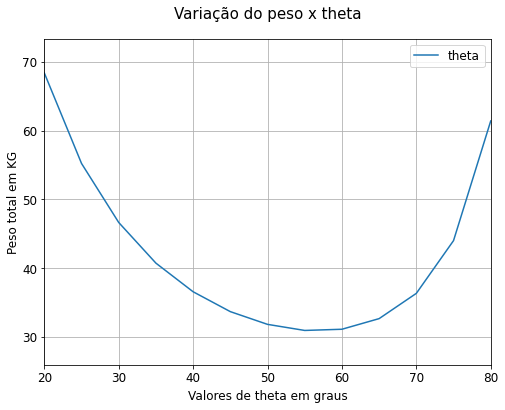

In [ ]:
#Para encontrarmos a solução ótima para o problema, basta encontrarmos o ângulo em que o somatório dos pesos da treliça foi o menor possível

print("Peso mínimo da treliça: "+ str(min(PESO_TOTAL[0])))
index = np.argmin(PESO_TOTAL[0])        #Encontrando o index do peso mínimo
print("Angulo para o menor peso encontrado: " + str(theta[index]) + "°")


# Função responsável por plotar os valores de t
def plot_results(x, label, labelX, labelY, title):
  intervalo = theta

  plt.figure(figsize = (8, 6))
  plt.plot(intervalo, x,'-', label=label)
  plt.xlim(np.amin(intervalo), np.amax(intervalo))
  plt.ylim(np.amin(x) - 5, np.amax(x) + 5)

  plt.grid(True)

  # Personalização do gráfico (label, fontes, titulos e subtitulos)
  plt.title(title, fontsize = 15, pad = 20)
  plt.xlabel(labelX, labelpad = 5, fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.ylabel(labelY, labelpad = 2, fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.legend(loc = "best", fontsize = 12, frameon = True)

  plt.show()

plot_results(PESO_TOTAL[0], "theta", "Valores de theta em graus", "Peso total em KG", "Variação do peso x theta")